In [75]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [76]:
df = pd.DataFrame()

In [77]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [78]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

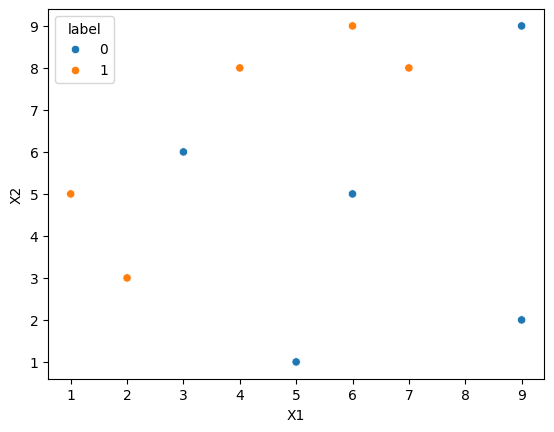

In [79]:
import seaborn as sns
sns.scatterplot(data=df,hue = 'label',x = 'X1',y = 'X2')

In [80]:
df['weights'] = 1/df.shape[0]

In [81]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [84]:
x = df.iloc[:,:2].values
y = df.iloc[:,2].values

In [85]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

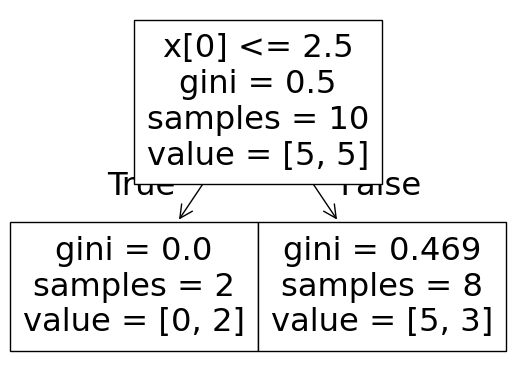

In [86]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

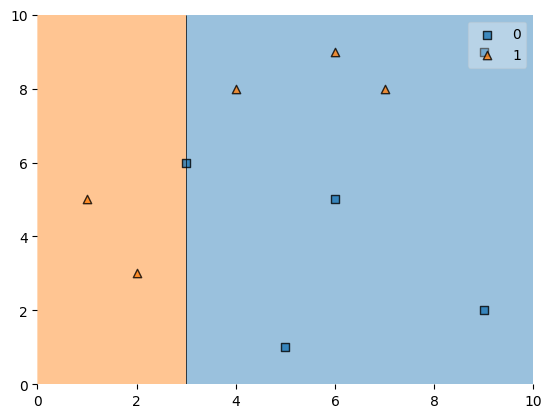

In [87]:
plot_decision_regions(x,y,clf=dt1)

In [88]:
df['y_pred'] = dt1.predict(x)

In [89]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [90]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/error+0.0001)

In [91]:
from sklearn.metrics import accuracy_score
error = 1 - accuracy_score(y,dt1.predict(x))
print(error)

0.30000000000000004


In [92]:
alpha1 = calculate_model_weight(error)
print(alpha1)

0.4236703583058598


In [93]:
def update_row_weights(row,alpha):
  if row['label'] == row['y_pred']:
    return row['weights']*np.exp(-alpha)
  else:
    return row['weights']*np.exp(alpha)

In [94]:
df['updated_weights'] = df.apply(lambda row: update_row_weights(row, alpha1), axis=1)


In [95]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065464
1,2,3,1,0.1,1,0.065464
2,3,6,0,0.1,0,0.065464
3,4,8,1,0.1,0,0.152756
4,5,1,0,0.1,0,0.065464
5,6,9,1,0.1,0,0.152756
6,6,5,0,0.1,0,0.065464
7,7,8,1,0.1,0,0.152756
8,9,9,0,0.1,0,0.065464
9,9,2,0,0.1,0,0.065464


In [96]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [97]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065464,0.071427
1,2,3,1,0.1,1,0.065464,0.071427
2,3,6,0,0.1,0,0.065464,0.071427
3,4,8,1,0.1,0,0.152756,0.166670
4,5,1,0,0.1,0,0.065464,0.071427
5,6,9,1,0.1,0,0.152756,0.166670
6,6,5,0,0.1,0,0.065464,0.071427
7,7,8,1,0.1,0,0.152756,0.166670
8,9,9,0,0.1,0,0.065464,0.071427
9,9,2,0,0.1,0,0.065464,0.071427


In [98]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [99]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065464,0.071427,0.071427,0.000000
1,2,3,1,0.1,1,0.065464,0.071427,0.142854,0.071427
2,3,6,0,0.1,0,0.065464,0.071427,0.214281,0.142854
3,4,8,1,0.1,0,0.152756,0.166670,0.380951,0.214281
4,5,1,0,0.1,0,0.065464,0.071427,0.452378,0.380951
5,6,9,1,0.1,0,0.152756,0.166670,0.619049,0.452378
6,6,5,0,0.1,0,0.065464,0.071427,0.690476,0.619049
7,7,8,1,0.1,0,0.152756,0.166670,0.857146,0.690476
8,9,9,0,0.1,0,0.065464,0.071427,0.928573,0.857146
9,9,2,0,0.1,0,0.065464,0.071427,1.000000,0.928573


In [100]:
def create_new_dataset(df):
  indices = []
  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper']>a and a>row['cumsum_lower']:
        indices.append(index)
  return indices
    

In [101]:
index_values = create_new_dataset(df)
print(index_values)

[5, 3, 1, 2, 5, 3, 1, 9, 3, 3]


In [102]:
second_df = df.iloc[index_values,:-5]

In [103]:
second_df

,X1,X2,label,weights
5,6,9,1,0.1
3,4,8,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
5,6,9,1,0.1
3,4,8,1,0.1
1,2,3,1,0.1
9,9,2,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1


In [104]:
dt2 = DecisionTreeClassifier(max_depth = 1)
x = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [105]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 7.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.25, 0.25, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.625, 0.5, '  False')]

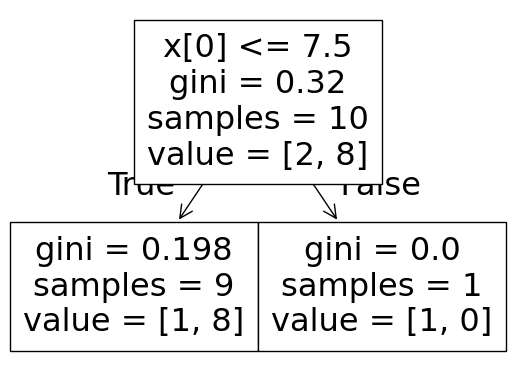

In [106]:
plot_tree(dt2)

<Axes: >

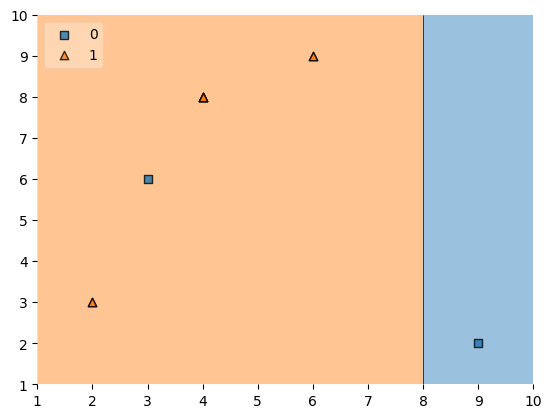

In [107]:
plot_decision_regions(x,y,clf=dt2,legend=2)

In [108]:
second_df['y_pred'] = dt2.predict(x)

In [109]:
second_df

,X1,X2,label,weights,y_pred
5,6,9,1,0.1,1
3,4,8,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
5,6,9,1,0.1,1
3,4,8,1,0.1,1
1,2,3,1,0.1,1
9,9,2,0,0.1,0
3,4,8,1,0.1,1
3,4,8,1,0.1,1


In [110]:
error = 1 - accuracy_score(y,dt2.predict(x))
print(error)

0.09999999999999998


In [111]:
alpha2 = calculate_model_weight(error)
print(alpha2)

1.0986178441928014


In [112]:
second_df['updated_weights'] = second_df.apply(lambda row: update_row_weights(row, alpha2), axis=1)


In [113]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
5,6,9,1,0.1,1,0.033333
3,4,8,1,0.1,1,0.033333
1,2,3,1,0.1,1,0.033333
2,3,6,0,0.1,1,0.300002
5,6,9,1,0.1,1,0.033333
3,4,8,1,0.1,1,0.033333
1,2,3,1,0.1,1,0.033333
9,9,2,0,0.1,0,0.033333
3,4,8,1,0.1,1,0.033333
3,4,8,1,0.1,1,0.033333


In [114]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [115]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
5,6,9,1,0.1,1,0.033333,0.055555
3,4,8,1,0.1,1,0.033333,0.055555
1,2,3,1,0.1,1,0.033333,0.055555
2,3,6,0,0.1,1,0.300002,0.500003
5,6,9,1,0.1,1,0.033333,0.055555
3,4,8,1,0.1,1,0.033333,0.055555
1,2,3,1,0.1,1,0.033333,0.055555
9,9,2,0,0.1,0,0.033333,0.055555
3,4,8,1,0.1,1,0.033333,0.055555
3,4,8,1,0.1,1,0.033333,0.055555


In [116]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [117]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
5,6,9,1,0.1,1,0.033333,0.055555,0.055555,0.000000
3,4,8,1,0.1,1,0.033333,0.055555,0.111110,0.055555
1,2,3,1,0.1,1,0.033333,0.055555,0.166666,0.111110
2,3,6,0,0.1,1,0.300002,0.500003,0.666669,0.166666
5,6,9,1,0.1,1,0.033333,0.055555,0.722224,0.666669
3,4,8,1,0.1,1,0.033333,0.055555,0.777779,0.722224
1,2,3,1,0.1,1,0.033333,0.055555,0.833334,0.777779
9,9,2,0,0.1,0,0.033333,0.055555,0.888890,0.833334
3,4,8,1,0.1,1,0.033333,0.055555,0.944445,0.888890
3,4,8,1,0.1,1,0.033333,0.055555,1.000000,0.944445


In [118]:
index_values = create_new_dataset(second_df)
print(index_values)

[5, 1, 2, 3, 2, 2, 2, 2, 3, 2]


In [119]:
third_df = second_df.iloc[index_values,:-5]

In [120]:
dt3 = DecisionTreeClassifier(max_depth = 1)
x = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values

In [121]:
dt3.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.625, 0.5, '  False')]

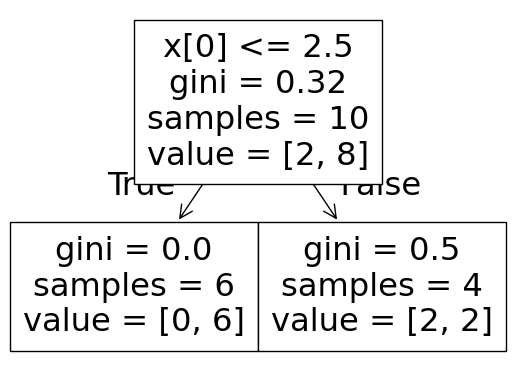

In [122]:
plot_tree(dt3)

<Axes: >

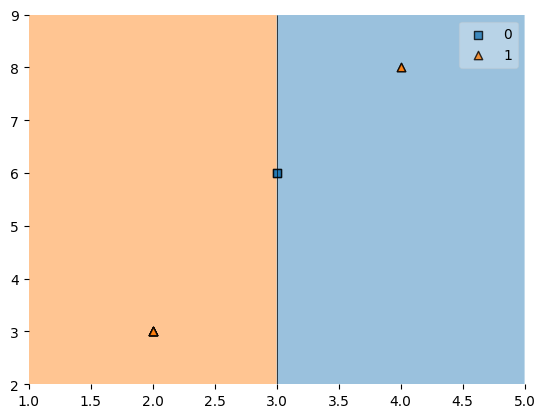

In [123]:
plot_decision_regions(x,y,clf=dt3)

In [124]:
third_df['y_pred'] = dt3.predict(x)

In [125]:
error = 1 - accuracy_score(y,dt3.predict(x))
print(error)

0.19999999999999996


In [126]:
alpha3 = calculate_model_weight(error)
print(alpha3)

0.693159680403698


In [127]:
third_df['updated_weights'] = third_df.apply(lambda row: update_row_weights(row, alpha3), axis=1)


In [128]:
third_df['normalized_weights'] = third_df['updated_weights']/third_df['updated_weights'].sum()

In [129]:
third_df['cumsum_upper'] = np.cumsum(third_df['normalized_weights'])
third_df['cumsum_lower'] = third_df['cumsum_upper'] - third_df['normalized_weights']

In [130]:
third_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
3,4,8,1,0.1,0,0.200002,0.250003,0.250003,0.000000
3,4,8,1,0.1,0,0.200002,0.250003,0.500006,0.250003
1,2,3,1,0.1,1,0.049999,0.062499,0.562505,0.500006
2,3,6,0,0.1,0,0.049999,0.062499,0.625005,0.562505
1,2,3,1,0.1,1,0.049999,0.062499,0.687504,0.625005
1,2,3,1,0.1,1,0.049999,0.062499,0.750003,0.687504
1,2,3,1,0.1,1,0.049999,0.062499,0.812502,0.750003
1,2,3,1,0.1,1,0.049999,0.062499,0.875002,0.812502
2,3,6,0,0.1,0,0.049999,0.062499,0.937501,0.875002
1,2,3,1,0.1,1,0.049999,0.062499,1.000000,0.937501


In [131]:
index_values = create_new_dataset(third_df)
print(index_values)

[3, 1, 1, 2, 2, 1, 1, 3, 3, 1]


In [132]:
fourth_df = third_df.iloc[index_values,:-5]

In [133]:
dt4 = DecisionTreeClassifier(max_depth = 1)
x = fourth_df.iloc[:,0:2].values
y = fourth_df.iloc[:,2].values

In [134]:
dt4.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 3.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.625, 0.5, '  False')]

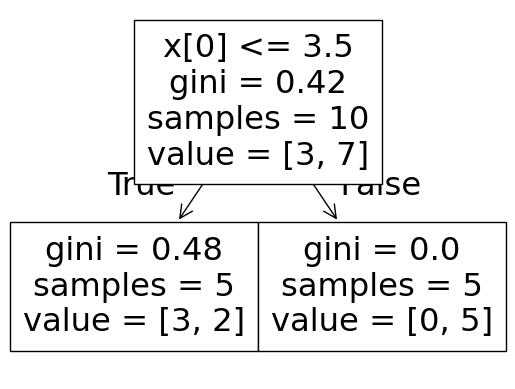

In [135]:
plot_tree(dt4)

<Axes: >

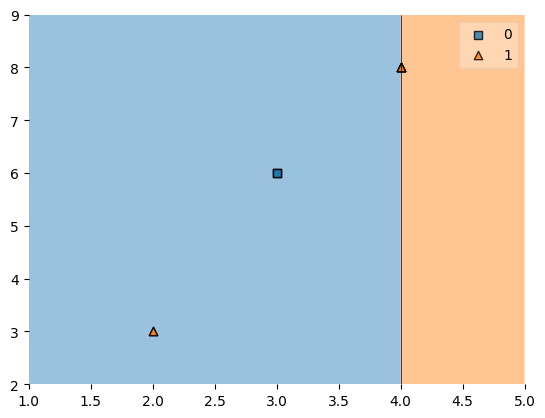

In [136]:
plot_decision_regions(x,y,dt4)

In [137]:
fourth_df['y_pred'] = dt4.predict(x)

In [138]:
error = 1 - accuracy_score(y,dt4.predict(x))
print(error)

0.19999999999999996


In [139]:
alpha4 = calculate_model_weight(error)
print(alpha4)

0.693159680403698


In [140]:
print(alpha1,alpha2,alpha3,alpha4)

0.4236703583058598 1.0986178441928014 0.693159680403698 0.693159680403698


Prediction

In [145]:
query = np.array([1,5]).reshape(1,2)


In [146]:
print(dt1.predict(query),
dt2.predict(query),
dt3.predict(query),
dt4.predict(query),sep='\n')


[1]
[1]
[1]
[0]


In [147]:
out = alpha1*1+alpha2*1+alpha3*1+alpha4*(-1)
np.sign(out)

1.0

In [148]:
query = np.array([9,9]).reshape(1,2)

In [149]:
print(dt1.predict(query),
dt2.predict(query),
dt3.predict(query),
dt4.predict(query),sep='\n')

[0]
[0]
[0]
[1]


In [150]:
out = alpha1*(-1)+alpha2*(-1)+alpha3*(-1)*alpha4*(1)
np.sign(out)

-1.0